In [1]:
import numpy as np
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
img_dir = '/pio/scratch/2/i258312/imdb_crop'
mat_file = '/pio/scratch/2/i258312/imdb_crop/imdb.mat'

In [3]:
import scipy.io
mat_data = scipy.io.loadmat(mat_file)

In [4]:
data_table = mat_data['imdb'][0][0]

In [5]:
ids = data_table[0][0,:]
years = data_table[1][0,:]
filenames = data_table[2][0,:]
sex = data_table[3][0,:] # ???
names = data_table[4][0,:]

In [6]:
len(ids), len(set(ids))

(460723, 13331)

In [7]:
set(years)

{1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015}

In [8]:
filenames.shape, filenames[34]

((460723,), array([u'02/nm0000002_rm4111175424_1924-9-16_2010.jpg'], 
       dtype='<U44'))

In [27]:
s = filenames[332][0]
s

u'24/nm0000024_rm2104020480_1904-4-14_1992.jpg'

In [28]:
import re

match = re.search('(\d\d\d\d)-(\d+)-(\d+)',s)
y = int(match.group(1))
m = int(match.group(2))
d = int(match.group(3))

In [29]:
from datetime import date

born = date(y,m,d)
taken = date(2012,7,1)
(taken - born).days / 365

108

In [18]:
uniq_sexes = defaultdict(int)
for s in sex:
    uniq_sexes[s] += 1

len(uniq_sexes.keys()) # a lot of NaNs there...

8464

In [19]:
names.shape, names[342]

((460723,), array([u'John Gielgud'], 
       dtype='<U12'))

In [20]:
from scipy import misc
from skimage.transform import resize
from skimage.util import crop
import glob
from collections import defaultdict

In [21]:
def read(filename):
    im = misc.imread(img_dir+'/'+filename[0])
    return im

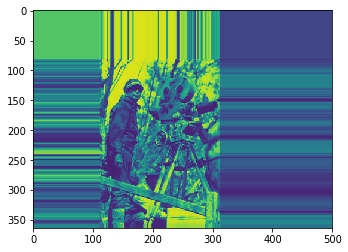

nan


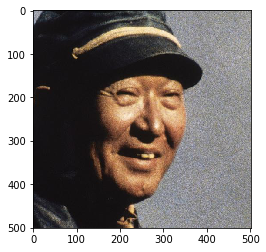

nan


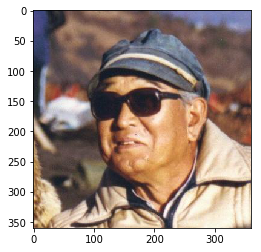

nan


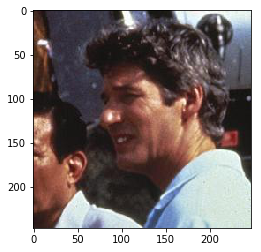

nan


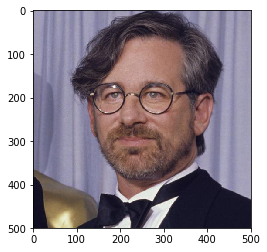

nan


In [22]:
for (i,s) in enumerate(sex[:10000]):
    if s not in [0.0,1.0]:
        im = read(filenames[i])
        imshow(im)
        show()
        print(s)

In [29]:
size = 30
margin = int(0.25*size)
before_crop = size+2*margin

In [30]:
def smaller(im):
    im = resize(im, (before_crop, before_crop, 3), mode='edge')
    im = crop(im, ((margin, margin), (margin, margin), (0,0)))
    return im

In [31]:
n = 0
images = []
sizes = defaultdict(int)
for filename in glob.glob(img_dir+'/01/*'):
    im = misc.imread(filename)
    im = smaller(im)
    images.append(im)
    sizes[im.shape] += 1
    n += 1

In [32]:
sizes.keys()

[(30, 30, 3)]

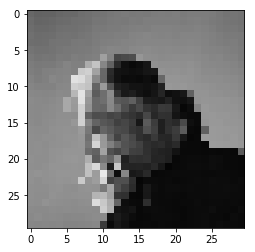

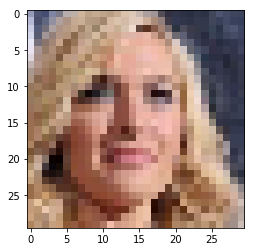

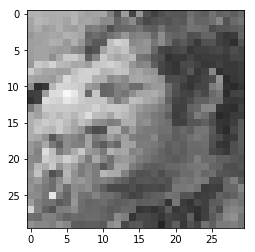

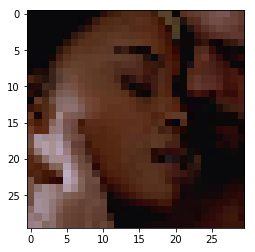

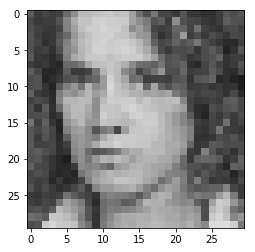

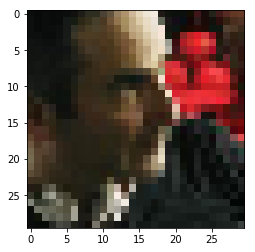

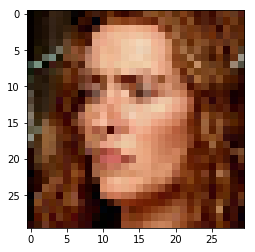

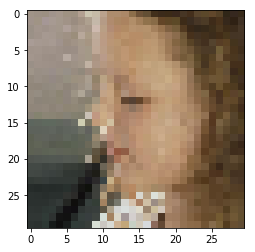

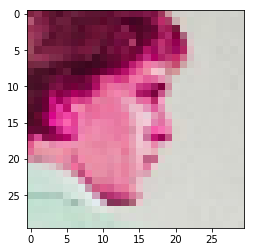

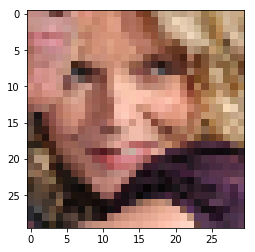

In [35]:
import matplotlib.pyplot as plt

sample = np.random.randint(0, n, 10)

for i in sample:
    imshow(images[i])
    show()

#for im in img_sample:
#   plt.imshow(im)
#  plt.show()

In [88]:
images = []
for f in filenames:
    images.append(read(f))

KeyboardInterrupt: 